# Explore and analyze the data

In [164]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


I'm using this notebook to explore and analyze the 4 imported datasets. 

## Step 1: Read all imported datasets

1. The amount of waste in all counties

In [130]:
amount_all = pd.read_csv('amount.csv')

2. Residential waste in all counties

In [131]:
residential_all = pd.read_csv('residential_total.csv')

3. Commercial waste in Alameda

In [132]:
commercial_alameda = pd.read_csv('commercial_alameda.csv')

4. Waste facilities in Alameda

In [133]:
sites= pd.read_csv('sites.csv')

## Step 2: Analyze datasets

I want to use these datasets to show different aspects of waste in Alameda, and answer several questions I had about them.

#### Q1: From 1990 to 2020, how many tons of garbage were landfilled in Alameda County each year?

To answer this question, I'm using the 'amount_all' dataframe.

In [9]:
# use pd.head() to see the first 5 rows of the dataframe
amount_all.head()

,county,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter,Total,Year
0,Alameda,724440.0,805801.0,798844.0,733191.0,3062276,1990
1,Amador,11438.0,13853.0,15138.0,12522.0,52951,1990
2,Butte,34460.0,38909.0,35016.0,30720.0,139105,1990
3,Calaveras,7720.0,9596.0,10581.0,8914.0,36811,1990
4,Colusa,3550.0,4215.0,4337.0,4157.0,16259,1990


Now I need to creat a dataframe to store data of the Alameda County only.

In [54]:
# select alameda data and reset the index
amount_alameda = amount_all[amount_all['county'] == 'Alameda'].copy().reset_index(drop = True)
amount_alameda

,county,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter,Total,Year
0,Alameda,724440.0,805801.0,798844.0,733191.0,3062276,1990
1,Alameda,641876.0,678486.0,677063.0,644406.0,2641831,1991
2,Alameda,575718.0,611953.0,616145.0,504394.0,2308210,1992
3,Alameda,551109.0,590210.0,576476.0,544351.0,2262146,1993
4,Alameda,499517.0,560553.0,562337.0,559908.0,2182315,1994
5,Alameda,574076.0,577246.0,591938.0,570146.0,2313406,1995
6,Alameda,547937.0,557263.0,567518.0,545117.0,2217835,1996
7,Alameda,532049.0,557484.0,580174.0,566774.0,2236481,1997
8,Alameda,534584.0,580081.0,601363.0,540901.0,2256929,1998
9,Alameda,535765.0,561868.0,618146.0,561732.0,2277511,1999


Now, create a bar chart using [Total] and [Year]

In [14]:
alt.Chart(amount_alameda).mark_bar().encode(
    
    x = 'Year:O',
    y = 'Total'
    
).properties(
    
    title = "Waste landfilled in Alameda between 1990 and 2020"
    
)

alt.Chart(...)

Looks like there has been less and less waste being landfilled or disposed in Alameda, and maybe it's the result of the county's efforts to better compost and recycle waste in recent years.

In [21]:
# looks like the largest amount was in 1990, check the max value 
amount_alameda['Total'].max()

3062276

In [20]:
# check the min value in 2016
amount_alameda['Total'].min()

1079574

In [35]:
# check the average value
amount_alameda['Total'].mean()

1888673.4516129033

What about making the chart a function so that I can check other county's data for comparison and contrast?

In [28]:
def view_county_chart(county_name):
    
    return alt.Chart(amount_all[amount_all['county'] == county_name] ).mark_bar().encode(
        
        x = 'Year:O',
        y = 'Total'
        
    ).properties(
        
        title=county_name
        
    )

Check how it works!

In [31]:
# get a list of counties
amount_all['county'].unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz',
       'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus',
       'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo',
       'Yuba', nan], dtype=object)

In [32]:
view_county_chart('Napa')

alt.Chart(...)

In [33]:
view_county_chart('Sacramento')

alt.Chart(...)

#### Q2: What were the major types of waste different business groups were producing in Alameda?

To answer this question, I'm using the commercial waste data, which reflects the waste production of different business types in Alameda in 2014. 

In [40]:
# check the first 5 rows of the data
commercial_alameda.head()

,Material Category,Material Type,Business Group,Tons Disposed,Tons Generated,Percent of Total Generation
0,Paper,Other Miscellaneous Paper - Compostable,"Arts, Entertainment, & Recreation",84.167324,113.304689,0.004579
1,Paper,Remainder / Composite Paper - Compostable,"Arts, Entertainment, & Recreation",1970.682031,2009.676522,0.081226
2,Other Organic,Food,"Arts, Entertainment, & Recreation",7008.399832,7603.351659,0.307306
3,Other Organic,Leaves and Grass,"Arts, Entertainment, & Recreation",1207.683583,1756.884480,0.071008
4,Other Organic,Prunings and Trimmings,"Arts, Entertainment, & Recreation",545.037053,1226.421650,0.049569


In [49]:
# see how many types of business group there are
commercial_alameda['Business Group'].unique()

array(['Arts, Entertainment, & Recreation',
       'Durable Wholesale & Trucking', 'Education', 'Hotels & Lodging',
       'Manufacturing - All Other', 'Manufacturing -Electronic Equipment',
       'Manufacturing - Food & Nondurable Wholesale', 'Medical & Health',
       'Multifamily', 'Not Elsewhere Classified', 'Public Administration',
       'Restaurants', 'Retail Trade - All Other',
       'Retail Trade - Food & Beverage Stores',
       'Services - Management, Administrative, Support, & Social',
       'Services - Professional, Technical, & Financial',
       'Services - Repair & Personal'], dtype=object)

I hope to create a loop to present all top 10 types of waste each kind of business group produced. I will mainly use [Material Type], [Business Group] and [Tons Generated] here.

First of all, create a function that return the top 10 types of waste produced by a business group.

In [85]:
def waste_top10(business):
    
    #subset the dataframe
    business_type = commercial_alameda[
    
        (commercial_alameda['Business Group'] == business)
    
    ].reset_index(drop = True).copy()
    
    # sort by [Tons Generated]
    business_sorted = business_type.sort_values('Tons Generated', ascending = False).copy().reset_index(drop = True)
    
    # subset the dataframe with only [material type] and [tons generated], and show the top 10 
    return business_sorted[['Material Type', 'Tons Generated']].head(10)

Check if it works.

In [86]:
waste_top10('Education')

,Material Type,Tons Generated
0,Food,8450.560295
1,Remainder / Composite Paper - Compostable,3080.052490
2,White Ledger Paper,1538.217642
3,Other Office Paper,1182.133024
4,Other Miscellaneous Paper - Other,1175.754664
5,Uncoated Corrugated Cardboard,1155.872991
6,Leaves and Grass,1022.177250
7,Magazines and Catalogs,447.624000
8,PETE Plastic Containers,400.857678
9,Newspaper,358.636215


It worked! Then I need to create a loop that run a table like this for each business type

In [88]:
from IPython.display import display

for item in commercial_alameda['Business Group'].unique():
    
    # get a title for each table
    print(item)
    
    # call the function
    display(waste_top10(item))

Arts, Entertainment, & Recreation


,Material Type,Tons Generated
0,Food,7603.351659
1,Remainder / Composite Paper - Compostable,2009.676522
2,Leaves and Grass,1756.884480
3,Prunings and Trimmings,1226.421650
4,Branches and Stumps,1129.781923
5,Uncoated Corrugated Cardboard,1074.451554
6,Other Miscellaneous Paper - Other,618.081738
7,Brown Glass Bottles and Containers,343.406524
8,Newspaper,343.301465
9,Clear Glass Bottles and Containers,327.722794


Durable Wholesale & Trucking


,Material Type,Tons Generated
0,Uncoated Corrugated Cardboard,21911.859792
1,Prunings and Trimmings,7377.546451
2,Clean Pallets & Crates,3362.167000
3,Food,2092.802017
4,Remainder / Composite Paper - Compostable,1527.187325
5,Clean Dimensional Lumber,947.038602
6,Other Miscellaneous Paper - Other,932.709828
7,Other Office Paper,884.933324
8,White Ledger Paper,860.060644
9,Clean Engineered Wood,468.885031


Education


,Material Type,Tons Generated
0,Food,8450.560295
1,Remainder / Composite Paper - Compostable,3080.052490
2,White Ledger Paper,1538.217642
3,Other Office Paper,1182.133024
4,Other Miscellaneous Paper - Other,1175.754664
5,Uncoated Corrugated Cardboard,1155.872991
6,Leaves and Grass,1022.177250
7,Magazines and Catalogs,447.624000
8,PETE Plastic Containers,400.857678
9,Newspaper,358.636215


Hotels & Lodging


,Material Type,Tons Generated
0,Food,2363.476054
1,Uncoated Corrugated Cardboard,636.066968
2,Remainder / Composite Paper - Compostable,623.636008
3,Clear Glass Bottles and Containers,325.457016
4,Clean Pallets & Crates,281.837310
5,Prunings and Trimmings,255.488592
6,Newspaper,216.532481
7,Other Miscellaneous Paper - Other,204.122667
8,Green Glass Bottles and Containers,195.588654
9,Leaves and Grass,157.126653


Manufacturing - All Other


,Material Type,Tons Generated
0,Other Miscellaneous Paper - Other,8256.359880
1,Uncoated Corrugated Cardboard,3866.398571
2,Clean Pallets & Crates,2234.414866
3,White Ledger Paper,1854.746967
4,Other Office Paper,1629.983040
5,Remainder / Composite Paper - Compostable,1354.678082
6,Clean Dimensional Lumber,1319.589775
7,Food,1225.327511
8,Magazines and Catalogs,563.655063
9,Other Miscellaneous Paper - Compostable,324.999080


Manufacturing -Electronic Equipment


,Material Type,Tons Generated
0,Uncoated Corrugated Cardboard,1433.112624
1,Clean Pallets & Crates,1222.881020
2,Remainder / Composite Paper - Compostable,690.374407
3,Food,689.885518
4,Leaves and Grass,291.537835
5,Clean Dimensional Lumber,244.894126
6,Other Miscellaneous Paper - Other,182.420461
7,Miscellaneous Plastic Containers,177.914737
8,White Ledger Paper,161.952357
9,Other Office Paper,136.890150


Manufacturing - Food & Nondurable Wholesale


,Material Type,Tons Generated
0,Food,20108.486438
1,Clean Pallets & Crates,3998.441321
2,Remainder / Composite Paper - Compostable,2357.359986
3,Uncoated Corrugated Cardboard,2030.319641
4,Leaves and Grass,1539.551180
5,Other Miscellaneous Paper - Other,1110.832269
6,Other Office Paper,477.543974
7,White Ledger Paper,453.529431
8,Clean Engineered Wood,329.953599
9,Clear Glass Bottles and Containers,285.379782


Medical & Health


,Material Type,Tons Generated
0,Food,8878.887057
1,Remainder / Composite Paper - Compostable,4372.054178
2,Uncoated Corrugated Cardboard,2624.943665
3,Newspaper,1184.643046
4,Other Miscellaneous Paper - Other,1109.318245
5,Leaves and Grass,1040.723160
6,Other Office Paper,986.308867
7,White Ledger Paper,726.812620
8,Clean Pallets & Crates,620.093818
9,Prunings and Trimmings,617.773932


Multifamily


,Material Type,Tons Generated
0,Food,31332.181061
1,Newspaper,9537.410301
2,Uncoated Corrugated Cardboard,8277.573330
3,Remainder / Composite Paper - Compostable,8116.590751
4,Other Miscellaneous Paper - Other,6509.891272
5,Leaves and Grass,3610.368282
6,Clear Glass Bottles and Containers,2892.853807
7,Clean Pallets & Crates,2361.035459
8,PETE Plastic Containers,2181.723065
9,Tin/Steel Cans,1420.220349


Not Elsewhere Classified


,Material Type,Tons Generated
0,Food,7268.477994
1,Prunings and Trimmings,5472.063505
2,Leaves and Grass,3453.739267
3,Uncoated Corrugated Cardboard,2699.328701
4,Remainder / Composite Paper - Compostable,1183.175464
5,Clean Engineered Wood,836.637639
6,Clean Pallets & Crates,677.219385
7,Other Miscellaneous Paper - Other,469.408686
8,Other Office Paper,298.669064
9,White Ledger Paper,271.956037


Public Administration


,Material Type,Tons Generated
0,Food,657.897629
1,Remainder / Composite Paper - Compostable,547.973740
2,White Ledger Paper,354.313307
3,Other Office Paper,230.414724
4,Uncoated Corrugated Cardboard,211.942939
5,Clean Pallets & Crates,193.938340
6,Other Miscellaneous Paper - Other,139.539525
7,Leaves and Grass,115.989089
8,Newspaper,102.431391
9,Magazines and Catalogs,77.643564


Restaurants


,Material Type,Tons Generated
0,Food,44683.481031
1,Remainder / Composite Paper - Compostable,9548.113844
2,Uncoated Corrugated Cardboard,7531.366320
3,Leaves and Grass,2305.867787
4,Newspaper,2110.707862
5,Clear Glass Bottles and Containers,1994.200593
6,Other Miscellaneous Paper - Other,1783.989333
7,Brown Glass Bottles and Containers,1497.427008
8,Green Glass Bottles and Containers,1437.811991
9,Tin/Steel Cans,1108.399245


Retail Trade - All Other


,Material Type,Tons Generated
0,Food,14366.344338
1,Uncoated Corrugated Cardboard,11033.574546
2,Remainder / Composite Paper - Compostable,6830.819331
3,Clean Pallets & Crates,4921.140455
4,Other Miscellaneous Paper - Other,2859.152424
5,Leaves and Grass,1909.122179
6,Other Office Paper,1759.748140
7,White Ledger Paper,1510.252337
8,Newspaper,1478.666421
9,Clear Glass Bottles and Containers,1096.843344


Retail Trade - Food & Beverage Stores


,Material Type,Tons Generated
0,Uncoated Corrugated Cardboard,38375.903398
1,Food,22528.226012
2,Clean Pallets & Crates,2833.610601
3,Remainder / Composite Paper - Compostable,1737.479529
4,Leaves and Grass,546.952276
5,Other Miscellaneous Paper - Other,494.375908
6,Clear Glass Bottles and Containers,362.546714
7,Newspaper,319.031981
8,PETE Plastic Containers,311.837457
9,Other Office Paper,265.618324


Services - Management, Administrative, Support, & Social


,Material Type,Tons Generated
0,Leaves and Grass,48520.240993
1,Food,14576.041840
2,Remainder / Composite Paper - Compostable,6464.551694
3,Uncoated Corrugated Cardboard,4086.065396
4,Clean Pallets & Crates,2317.291330
5,Other Miscellaneous Paper - Other,2232.783304
6,Prunings and Trimmings,2198.318448
7,White Ledger Paper,1745.042379
8,Other Office Paper,1657.648356
9,Newspaper,923.269899


Services - Professional, Technical, & Financial


,Material Type,Tons Generated
0,Uncoated Corrugated Cardboard,22029.173528
1,Remainder / Composite Paper - Compostable,15755.428986
2,Clean Pallets & Crates,14230.078396
3,Food,13345.851493
4,Leaves and Grass,13073.781851
5,Other Miscellaneous Paper - Other,8171.727459
6,White Ledger Paper,5765.482614
7,Other Office Paper,5220.772060
8,Prunings and Trimmings,5072.453901
9,Newspaper,4862.675937


Services - Repair & Personal


,Material Type,Tons Generated
0,Food,3499.250792
1,Uncoated Corrugated Cardboard,1856.274781
2,Remainder / Composite Paper - Compostable,989.915540
3,Other Miscellaneous Paper - Other,479.093951
4,Clean Pallets & Crates,413.124653
5,Leaves and Grass,381.658315
6,Newspaper,312.907542
7,HDPE Plastic Containers,267.852103
8,Other Miscellaneous Paper - Compostable,198.281459
9,White Ledger Paper,188.818627


#### Q3: What are the major types of residential waste in Alameda?

To answer this question, I'm using the residential waste data.

First of all, check the data.

In [89]:
residential_all

,Material Category,Material Type,Jurisdiction,Single Family Tons,Regional Single Family Composition,Multi Family Tons,Statewide Multi Family Composition,Total Residential Tons,Total Residential Composition
0,Paper,Uncoated Corrugated Cardboard,Alameda (Countywide),1917,0.006688,4231,0.035679,6147,0.015173
1,Paper,Paper Bags,Alameda (Countywide),898,0.003132,625,0.005275,1523,0.003759
2,Paper,Newspaper,Alameda (Countywide),2078,0.007250,5506,0.046431,7583,0.018717
3,Paper,White Ledger Paper,Alameda (Countywide),531,0.001854,627,0.005287,1158,0.002859
4,Paper,Other Office Paper,Alameda (Countywide),1368,0.004775,698,0.005888,2067,0.005101
...,...,...,...,...,...,...,...,...,...
3939,Special Waste,Treated Medical Waste,Yuba (Countywide),0,0.000000,26,0.007386,26,0.001394
3940,Special Waste,Bulky Items,Yuba (Countywide),7,0.000466,99,0.028140,106,0.005691
3941,Special Waste,Tires,Yuba (Countywide),68,0.004516,0,0.000000,68,0.003663
3942,Special Waste,Remainder / Composite Special Waste,Yuba (Countywide),13,0.000883,1,0.000202,14,0.000755


I want to rename the [Jurisdiction] column to remove "(Countywide)"

In [91]:
# rename the jurisdiction column
residential_all['Jurisdiction'] = residential_all['Jurisdiction'].str.replace(' (Countywide)', '', regex=False)
residential_all

,Material Category,Material Type,Jurisdiction,Single Family Tons,Regional Single Family Composition,Multi Family Tons,Statewide Multi Family Composition,Total Residential Tons,Total Residential Composition
0,Paper,Uncoated Corrugated Cardboard,Alameda,1917,0.006688,4231,0.035679,6147,0.015173
1,Paper,Paper Bags,Alameda,898,0.003132,625,0.005275,1523,0.003759
2,Paper,Newspaper,Alameda,2078,0.007250,5506,0.046431,7583,0.018717
3,Paper,White Ledger Paper,Alameda,531,0.001854,627,0.005287,1158,0.002859
4,Paper,Other Office Paper,Alameda,1368,0.004775,698,0.005888,2067,0.005101
...,...,...,...,...,...,...,...,...,...
3939,Special Waste,Treated Medical Waste,Yuba,0,0.000000,26,0.007386,26,0.001394
3940,Special Waste,Bulky Items,Yuba,7,0.000466,99,0.028140,106,0.005691
3941,Special Waste,Tires,Yuba,68,0.004516,0,0.000000,68,0.003663
3942,Special Waste,Remainder / Composite Special Waste,Yuba,13,0.000883,1,0.000202,14,0.000755


Now it looks better! Then I need to separate the Alameda data.

In [92]:
residential_alameda = residential_all[
    
    residential_all['Jurisdiction'] == 'Alameda'

].copy()

In [93]:
residential_alameda

,Material Category,Material Type,Jurisdiction,Single Family Tons,Regional Single Family Composition,Multi Family Tons,Statewide Multi Family Composition,Total Residential Tons,Total Residential Composition
0,Paper,Uncoated Corrugated Cardboard,Alameda,1917,0.006688,4231,0.035679,6147,0.015173
1,Paper,Paper Bags,Alameda,898,0.003132,625,0.005275,1523,0.003759
2,Paper,Newspaper,Alameda,2078,0.007250,5506,0.046431,7583,0.018717
3,Paper,White Ledger Paper,Alameda,531,0.001854,627,0.005287,1158,0.002859
4,Paper,Other Office Paper,Alameda,1368,0.004775,698,0.005888,2067,0.005101
...,...,...,...,...,...,...,...,...,...
63,Special Waste,Treated Medical Waste,Alameda,0,0.000000,876,0.007386,876,0.002162
64,Special Waste,Bulky Items,Alameda,13431,0.046868,3337,0.028140,16768,0.041387
65,Special Waste,Tires,Alameda,81,0.000282,0,0.000000,81,0.000200
66,Special Waste,Remainder / Composite Special Waste,Alameda,928,0.003237,24,0.000202,952,0.002349


In [97]:
alameda_material = residential_alameda[['Material Category', 'Material Type', 'Total Residential Tons']].copy()
alameda_material

,Material Category,Material Type,Total Residential Tons
0,Paper,Uncoated Corrugated Cardboard,6147
1,Paper,Paper Bags,1523
2,Paper,Newspaper,7583
3,Paper,White Ledger Paper,1158
4,Paper,Other Office Paper,2067
...,...,...,...
63,Special Waste,Treated Medical Waste,876
64,Special Waste,Bulky Items,16768
65,Special Waste,Tires,81
66,Special Waste,Remainder / Composite Special Waste,952


In [108]:
alameda_sum = alameda_material.groupby(['Material Category']).sum().sort_values('Total Residential Tons', ascending = False).copy()
alameda_sum

,Total Residential Tons
Material Category,
Other Organic,188811
Paper,78914
Plastic,40893
Mixed Residue,26359
Inerts and Other,26232
Special Waste,18838
Metal,10689
Glass,8903
Electronics,4565


In [128]:
# Rename the column
alameda_sum.rename(columns = {'Total Residential Tons': 'Alameda'}, inplace = True)
alameda_sum

,Alameda
Material Category,
Other Organic,188811
Paper,78914
Plastic,40893
Mixed Residue,26359
Inerts and Other,26232
Special Waste,18838
Metal,10689
Glass,8903
Electronics,4565


So the top three waste types in Alameda are 'other organic'(such as food, leaves and branches), 'paper' and 'plastic'.

#### Q4：What is the proportion of waste disposed in Alameda in the whole state？

This is a follow-up question coming out of the residential waste data. 

Now I need to get the statewide total of each material category, and calculate the proportion of Alameda.

In [119]:
all_material = residential_all[['Material Category', 'Material Type', 'Total Residential Tons']].copy() 
all_material

,Material Category,Material Type,Total Residential Tons
0,Paper,Uncoated Corrugated Cardboard,6147
1,Paper,Paper Bags,1523
2,Paper,Newspaper,7583
3,Paper,White Ledger Paper,1158
4,Paper,Other Office Paper,2067
...,...,...,...
3939,Special Waste,Treated Medical Waste,26
3940,Special Waste,Bulky Items,106
3941,Special Waste,Tires,68
3942,Special Waste,Remainder / Composite Special Waste,14


In [120]:
state_sum = all_material.groupby(['Material Category']).sum().sort_values('Total Residential Tons', ascending = False).copy()
state_sum

,Total Residential Tons
Material Category,
Other Organic,4438683
Paper,1890259
Inerts and Other,1009150
Plastic,1004166
Mixed Residue,476744
Special Waste,312671
Metal,288854
Glass,219406
Electronics,115153


In [122]:
# Rename the column
state_sum.rename(columns = {'Total Residential Tons': 'Total'}, inplace = True)
state_sum

,Total
Material Category,
Other Organic,4438683
Paper,1890259
Inerts and Other,1009150
Plastic,1004166
Mixed Residue,476744
Special Waste,312671
Metal,288854
Glass,219406
Electronics,115153


Use outer join to combine the two tables.

In [123]:
material_compare = pd.merge(alameda_sum, state_sum,
                           
                           how = 'outer', on = 'Material Category'
                           
                           )

material_compare

,Alameda,Total
Material Category,,
Other Organic,188811,4438683
Paper,78914,1890259
Plastic,40893,1004166
Mixed Residue,26359,476744
Inerts and Other,26232,1009150
Special Waste,18838,312671
Metal,10689,288854
Glass,8903,219406
Electronics,4565,115153


Now I want to create a new column to show the percent of Alameda waste

In [125]:
material_compare['Percent of Alameda'] = material_compare['Alameda'] / material_compare['Total']
material_compare

,Alameda,Total,Percent of Alameda
Material Category,,,
Other Organic,188811,4438683,0.042538
Paper,78914,1890259,0.041748
Plastic,40893,1004166,0.040723
Mixed Residue,26359,476744,0.055290
Inerts and Other,26232,1009150,0.025994
Special Waste,18838,312671,0.060249
Metal,10689,288854,0.037005
Glass,8903,219406,0.040578
Electronics,4565,115153,0.039643


In [127]:
# sort by percent
material_compare.sort_values('Percent of Alameda', ascending = False)

,Alameda,Total,Percent of Alameda
Material Category,,,
Special Waste,18838,312671,0.060249
Mixed Residue,26359,476744,0.055290
Other Organic,188811,4438683,0.042538
Paper,78914,1890259,0.041748
Plastic,40893,1004166,0.040723
Glass,8903,219406,0.040578
Electronics,4565,115153,0.039643
Metal,10689,288854,0.037005
Inerts and Other,26232,1009150,0.025994


It's kind of surprising that 'special waste' and mixed residue are the two materials with the highest proportion!

#### Q5: How many waste management facilities were documented in Alameda? What's their status?

To answer this question, I'm analyzing the 'sites' dataframe to see the types and status of waste facilities in Alameda.

First of all, check the first 5 rows of the data.

In [134]:
sites.head()

,SWIS Number,Activity,OperationalStatus,Category,Activity Classification,County
0,01-AA-0006,Solid Waste Disposal Site,Closed,Disposal,Solid Waste Disposal Site,Alameda
1,01-AC-0029,Large Volume Transfer/Processing Facility,Active,Transfer/Processing,Solid Waste Facility,Alameda
2,01-CR-0005,Solid Waste Disposal Site,Closed,Disposal,Solid Waste Disposal Site,Alameda
3,01-CR-0031,Solid Waste Disposal Site,Closed,Disposal,Solid Waste Disposal Site,Alameda
4,03-CR-0005,Solid Waste Disposal Site,Closed,Disposal,Solid Waste Disposal Site,Amador


Create a new dataframe to store the Alameda data.

In [138]:
sites_alameda = sites[

    (sites['County'] == 'Alameda')

].reset_index(drop = True).copy()

sites_alameda

,SWIS Number,Activity,OperationalStatus,Category,Activity Classification,County
0,01-AA-0006,Solid Waste Disposal Site,Closed,Disposal,Solid Waste Disposal Site,Alameda
1,01-AC-0029,Large Volume Transfer/Processing Facility,Active,Transfer/Processing,Solid Waste Facility,Alameda
2,01-CR-0005,Solid Waste Disposal Site,Closed,Disposal,Solid Waste Disposal Site,Alameda
3,01-CR-0031,Solid Waste Disposal Site,Closed,Disposal,Solid Waste Disposal Site,Alameda
4,01-AA-0290,Large Volume Transfer/Processing Facility,Active,Transfer/Processing,Solid Waste Facility,Alameda
...,...,...,...,...,...,...
66,01-CR-0047,Solid Waste Disposal Site,Closed,Disposal,Solid Waste Disposal Site,Alameda
67,01-AA-0296,Medium Volume CDI Debris Processing Facility,Closed,Transfer/Processing,Solid Waste Facility,Alameda
68,01-CR-0048,Solid Waste Disposal Site,Closed,Disposal,Solid Waste Disposal Site,Alameda
69,01-AA-0315,Medium Volume CDI Debris Processing Facility,Active,Transfer/Processing,Solid Waste Facility,Alameda


Check if all the sites are unique.

In [144]:
sites_alameda[sites_alameda['SWIS Number '].duplicated()]

,SWIS Number,Activity,OperationalStatus,Category,Activity Classification,County
9,01-AA-0009,Asbestos Containing Waste Disposal Site,Active,Disposal,Solid Waste Facility,Alameda
43,01-AA-0007,Large Volume In-Vessel Digestion Facility,Active,In-Vessel Digestion,Solid Waste Facility,Alameda


Looks like they are not duplicated.

Then, I hope to see the proportion of various facilities and create a pie chart.

In [149]:
sites_alameda['Category'].unique()

array(['Disposal', 'Transfer/Processing', 'Composting',
       'In-Vessel Digestion'], dtype=object)

In [157]:
# count the number of each type of facilities
sites_category = sites_alameda.groupby(['Category']).count()
sites_category

,SWIS Number,Activity,OperationalStatus,Activity Classification,County
Category,,,,,
Composting,9,9,9,9,9
Disposal,41,41,41,41,41
In-Vessel Digestion,1,1,1,1,1
Transfer/Processing,20,20,20,20,20


In [158]:
# only need the 'SWIS Number' column
sites_category = sites_category[['SWIS Number ']].copy()
sites_category.columns = ['Count']
sites_category = sites_category.reset_index()
sites_category

,Category,Count
0,Composting,9
1,Disposal,41
2,In-Vessel Digestion,1
3,Transfer/Processing,20


Create a new column that shows the percent of the category

In [160]:
# 71 is the total of sites
sites_category['percent'] = sites_category['Count'] / 71
sites_category

,Category,Count,percent
0,Composting,9,0.126761
1,Disposal,41,0.577465
2,In-Vessel Digestion,1,0.014085
3,Transfer/Processing,20,0.281690


Create a pie chart.

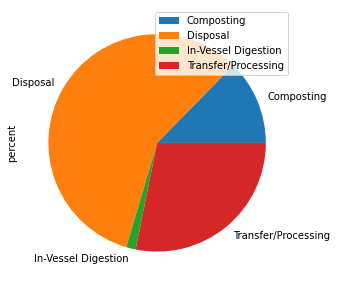

In [166]:
category_chart = pd.DataFrame({
    
    'percent': [0.126761, 0.577465, 0.014085, 0.281690],
    'count': [9, 41, 1, 20]},

    index = ['Composting', 'Disposal', 'In-Vessel Digestion', 'Transfer/Processing'])

plot = category_chart.plot.pie(y = 'percent', figsize=(5, 5))

So, what's the status of these facilities?

In [167]:
sites_alameda['OperationalStatus'].unique()

array(['Closed', 'Active', 'Planned'], dtype=object)

In [168]:
sites_status = sites_alameda.groupby(['OperationalStatus']).count()
sites_status

,SWIS Number,Activity,Category,Activity Classification,County
OperationalStatus,,,,,
Active,29,29,29,29,29
Closed,41,41,41,41,41
Planned,1,1,1,1,1


In [169]:
# only use the 'SWIS Number' column
sites_status = sites_status[['SWIS Number ']].copy()
sites_status.columns = ['Count']
sites_status = sites_status.reset_index()
sites_status

,OperationalStatus,Count
0,Active,29
1,Closed,41
2,Planned,1


In [170]:
# create a new column to show the percent of each kind of status
sites_status['percent'] = sites_status['Count'] / 71
sites_status

,OperationalStatus,Count,percent
0,Active,29,0.408451
1,Closed,41,0.577465
2,Planned,1,0.014085


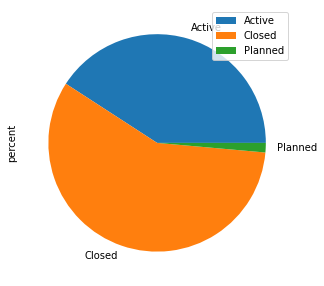

In [171]:
# create a pie chart
status_chart = pd.DataFrame({
    
    'percent': [0.408451, 0.577465, 0.014085],
    'count': [29, 41, 1]},

    index = ['Active', 'Closed', 'Planned'])

plot = status_chart.plot.pie(y = 'percent', figsize=(5, 5))